
Importations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('Soundscape Scatter Plot.xlsx', usecols="B:I", skiprows=1)

# Define the categories based on the column names
categories = df.columns.tolist()

# Function to generate random colors
def get_random_color():
    return np.random.rand(3,)

# Add values to 'columns'
columns = {}
for index, row in df.iterrows():
    columns[f'Area {index+1}'] = tuple(row)

# Generate a list of random colors for each area/location
n_areas = len(columns)  # Number of areas/locations
colors = [get_random_color() for _ in range(n_areas)]


# Define the calculate_coordinates function
def calculate_coordinates(p, v, e, ch, a, m, u, ca):
    P = (p - a) + np.cos(np.deg2rad(45)) * (ca - ch) + np.cos(np.deg2rad(45)) * (v - m)
    E = (e - u) + np.cos(np.deg2rad(45)) * (ch - ca) + np.cos(np.deg2rad(45)) * (v - m)
    return P, E

Soundscape Radar Plot	

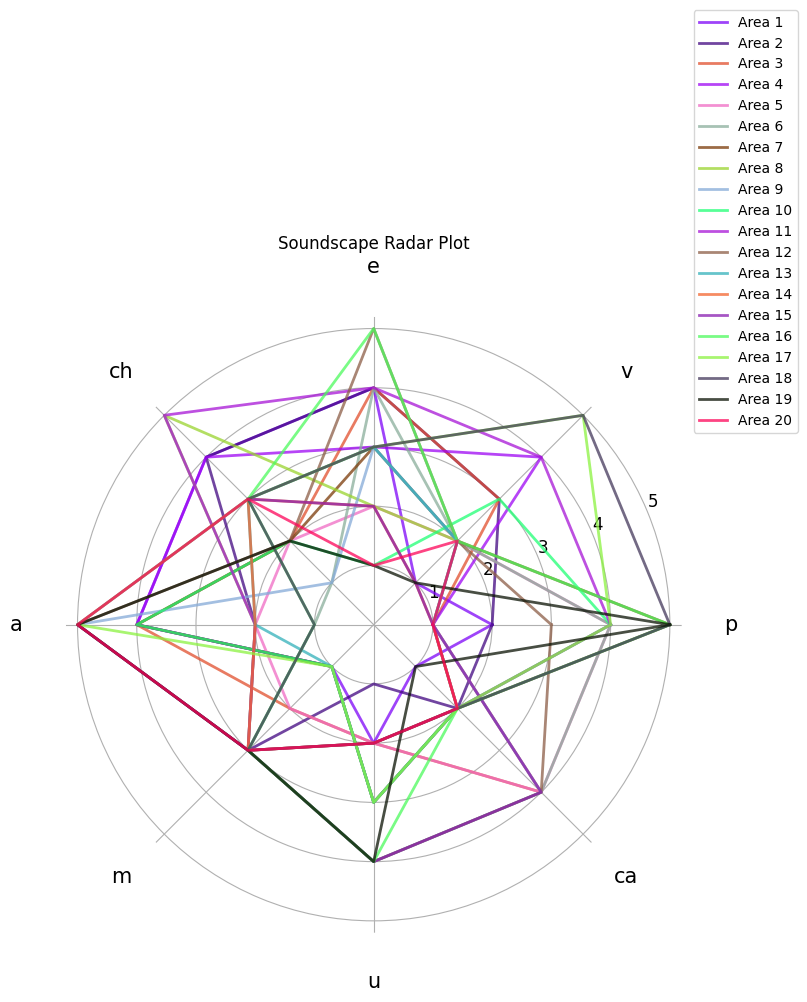

In [3]:

assert len(categories) == len(columns['Area 1'])

# Set up the polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Calculate the angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Plot each area with the unique color from the pre-generated list
for i, (area, values) in enumerate(columns.items()):
    ax.plot(angles, list(values) + [values[0]], linestyle='-', linewidth=2, label=area, color=colors[i], alpha=0.75)

# Customize the plot
plt.yticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'], fontsize=12)
plt.xticks(angles[:-1], categories, fontsize=15)

ax.spines['polar'].set_color('none')
ax.tick_params(axis='x', pad=25)

plt.title('Soundscape Radar Plot')

plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.8))

# Show the plot
plt.show()


Soundscape Scatter Plot	

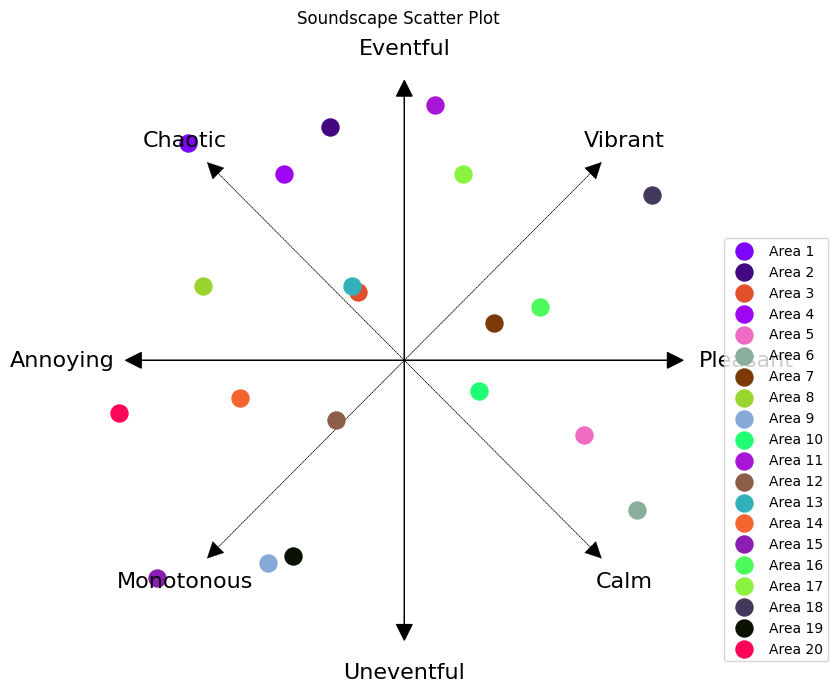

In [4]:
# Labels for the arrows
arrow_labels = ['Pleasant', 'Vibrant', 'Eventful', 'Chaotic', 'Annoying', 'Monotonous', 'Uneventful', 'Calm']

# Initialize lists to store P and E coordinates for each location
P_values = []
E_values = []

# Create a scatter plot for all locations
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed

# Add arrows representing the eight directions with larger arrowheads
for angle in range(0, 360, 45):
    dx = 5 * np.cos(np.deg2rad(angle))
    dy = 5 * np.sin(np.deg2rad(angle))
    
    # Set thinner line width for diagonals and make them dashed
    lw = 0.3 if angle % 90 == 45 else 0.8
    linestyle = '--' if angle % 90 == 45 else '-'
    
    plt.arrow(0, 0, dx, dy, head_width=0.3, head_length=0.3, fc='black', ec='black', lw=lw, linestyle=linestyle)

# Plot the scattered points for the locations with different colors and larger points
for i, (location, values) in enumerate(columns.items()):
    p, ca, ch, e, m, a, u, v = values
    P, E = calculate_coordinates(p, ca, ch, e, m, a, u, v)
    
    plt.scatter(P, E, s=150, marker='o', color=colors[i], label=location)

    # Append P and E values to the lists
    P_values.append(P)
    E_values.append(E)

# Add labels at the end of each arrowhead with larger fontsize
for i, label in enumerate(arrow_labels):
    angle = i * 45
    offset = 1.5 if label in ['Pleasant', 'Annoying'] else 0.9
    dx = (5 + offset) * np.cos(np.deg2rad(angle))
    dy = (5 + offset) * np.sin(np.deg2rad(angle))
    plt.text(dx, dy, label, ha='center', va='center', fontsize=16)

# Set the background color to white
plt.gca().set_facecolor('white')

# Hide the x and y ticks
plt.xticks([])
plt.yticks([])

# Remove the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Legend
plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0))
plt.title('Soundscape Scatter Plot \n')
plt.show()


Soundscape Scatter Plot	

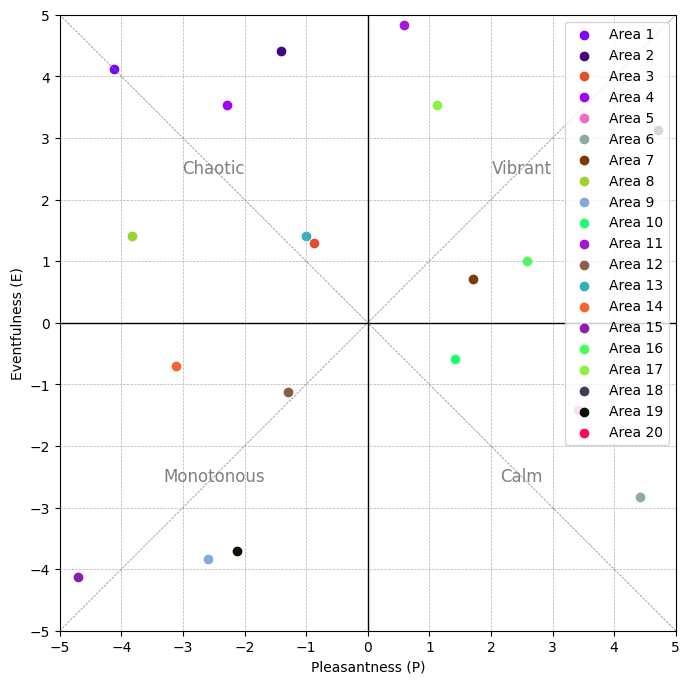

In [6]:
# Normalize data toggle (YES or NO)
normalize_data = False  # Change to False to use -5 to 5 scale

# Initialize lists to store P and E coordinates for each location
P_values = []
E_values = []

for location, values in columns.items():
    # Extract PAQ values for the current location
    p, ca, ch, e, m, a, u, v = values

    if normalize_data:
        # Normalize values from 1 to -1
        p, ca, ch, e, m, a, u, v = [(x - 1) / 4 for x in (p, ca, ch, e, m, a, u, v)]

    # Calculate P and E coordinates for the current location
    P, E = calculate_coordinates(p, ca, ch, e, m, a, u, v)
   
    # Append P and E values to the lists
    P_values.append(P)
    E_values.append(E)

# Create a scatter plot for all locations
plt.figure(figsize=(8, 8))
for i, location in enumerate(columns.keys()):
    plt.scatter(P_values[i], E_values[i], marker='o', color=colors[i], label=location)

# Add text labels to each quadrant within the grid (center-aligned)
plt.text(-2.5, 2.5, 'Chaotic', color='grey', fontsize=12, ha='center', va='center')
plt.text(2.5, 2.5, 'Vibrant', color='grey', fontsize=12, ha='center', va='center')
plt.text(-2.5, -2.5, 'Monotonous', color='grey', fontsize=12, ha='center', va='center')
plt.text(2.5, -2.5, 'Calm', color='grey', fontsize=12, ha='center', va='center')

# Add diagonal dashed lines manually (gray and thin)
plt.plot([-5, 5], [-5, 5], '--', linewidth=0.5, color='grey')
plt.plot([-5, 5], [5, -5], '--', linewidth=0.5, color='grey')

# Add stronger lines on the x and y axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2) if normalize_data else np.arange(-5, 5.1, 1))
plt.yticks(np.arange(-1, 1.1, 0.2) if normalize_data else np.arange(-5, 5.1, 1))
plt.xlabel('Pleasantness (P)')
plt.ylabel('Eventfulness (E)')
# plt.title('Soundscape Scatter Plot')
plt.gca().set_aspect('equal')

# Show the legend
plt.legend()
plt.show()
